In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from pynwb import NWBHDF5IO

In [2]:
filepath = "verbal/sub-01_ses-20161214T171300_behavior+ecephys.nwb"
# Open the file in read mode "r",
io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)
nwbfile = io.read()
nwbfile

/usr/local/anaconda3/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/anaconda3/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x140656412997856
Fields:
  acquisition: {
    ecephys.eeg <class 'pynwb.ecephys.ElectricalSeries'>,
    ecephys.ieeg <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    ATLAS Neurophysiology System <class 'pynwb.device.Device'>,
    NicoletOne EEG System <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    eeg <class 'pynwb.ecephys.ElectrodeGroup'>,
    ieeg <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Task Name: Sternberg
Task Description: The task is a modified Sternberg task in which the encoding of memory items, maintenance, and recall were temporally separated. Each trial starts with a fixation period ([-6, -5] s), followed by the stimulus ([-5, -3] s). The stimulus consists of a set of eight consonants at the center of the screen. The middle four, six, or eight letters are the memory items,which determine the set size for the trial (4, 6, or 8, respectively). The outer positions are filled with “X,” which is never a memory item. After the stimulus, the letters disappear from the screen, and the maintenance interval starts ([-3, 0] s).A fixation square is shown throughout fixation, encoding, and maintenance. After maintenance, a probe letter is presented. The subjects respond with a button press to indicate whether the probe was part of the stimulus.The subjects are instructed to respond as rapidly as possible without making errors. The hand used for the response is counterbalanced across subjects within the clinical constraints. After the response, the probe is turned off, and the subjects receive acoustic feedback regarding whether their response was correct or incorrect. Before initiating the next trial, the subjects were encouraged to blink and relax. The subjects perform 50 trials in one session, which last approximately 10 min. Trials with different set sizes are presented in a random order,with the single exception that a trial with an incorrect response is always followed by a trial with a set size of 4.
Task URL: http://www.neurobs.com/ex_files/expt_view?id=266
  experimenter: ['Boran, Ece']
  file_create_date: [datetime.datetime(2023, 9, 4, 19, 24, 43, 802937, tzinfo=tzoffset(None, 7200))]
  identifier: Human_MTL_units_scalp_EEG_and_iEEG_verbal_WM_subject01_session01
  institution: Universitätsspital Zürich, 8091 Zurich, Switzerland
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>,
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <HDF5 dataset "keywords": shape (16,), type "|O">
  lab: Schweizerische Epilepsie-Zentrum, 8008 Zurich, Switzerland
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['doi: 10.1126/sciadv.aav3687']
  session_description: Running experiment as described in the the experiment description
  session_start_time: 2016-12-14 17:13:00+01:00
  subject: subject pynwb.file.Subject at 0x140656412996608
Fields:
  age: P24Y
  age__reference: birth
  description: Handedness: Right
Pathology: Xanthoastrocytoma WHO II
Depth electrodes: AHL,AL,ECL,LR,PHL,PHR
Electrodes in seizure onset zone (SOZ): AHR,LR
  sex: F
  species: Homo sapiens
  subject_id: 01

  timestamps_reference_time: 2016-12-14 17:13:00+01:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

In [239]:
electrodes = nwbfile.electrodes.to_dataframe()
electrodes.y = -electrodes.y

fig = px.scatter_3d(
    electrodes,
    x="x",
    y="z",
    z="y",
    text="label",
    title="EEG Electrodes",
    width=800,
    height=800,
    color="group_name"
)


fig.show()

In [3]:
eeg = nwbfile.acquisition["ecephys.eeg"]
eeg

ecephys.eeg pynwb.ecephys.ElectricalSeries at 0x140656412681744
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (80000, 19), type "<f8">
  description: Scalp EEG data
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (80000,), type "<f8">
  timestamps_unit: seconds
  unit: volts

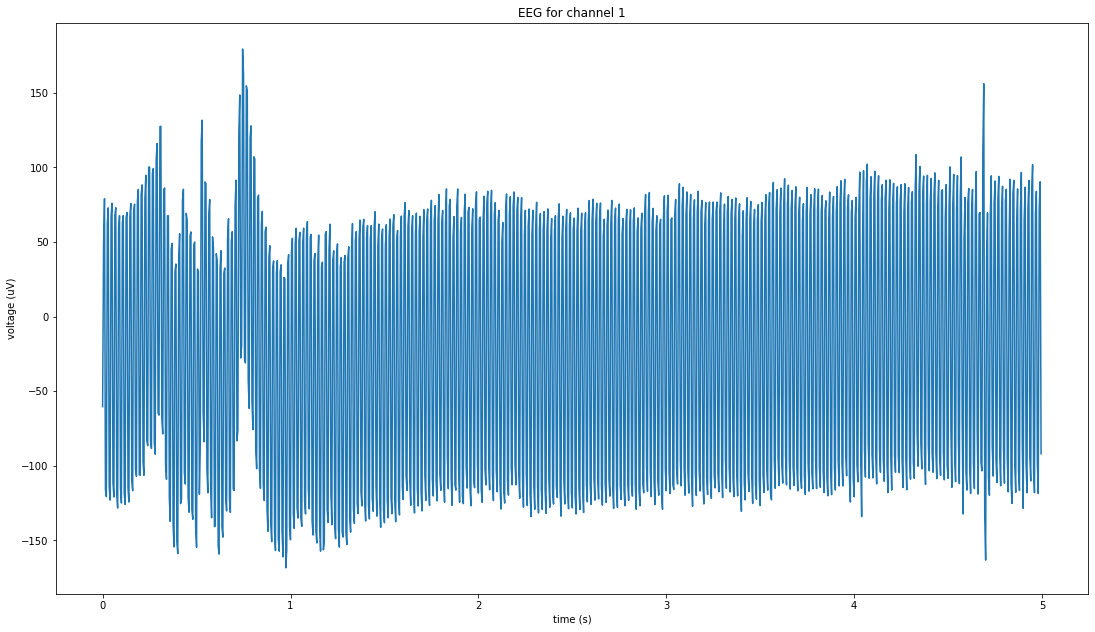

In [280]:
channel = 0
datapoints = 1000
time = eeg.timestamps[:datapoints]
data = eeg.data[:datapoints, channel]
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(time, data)
ax.set_xlabel("time (s)")
ax.set_ylabel("voltage (uV)")
ax.set_title(f"EEG for channel {channel + 1}")
plt.show()

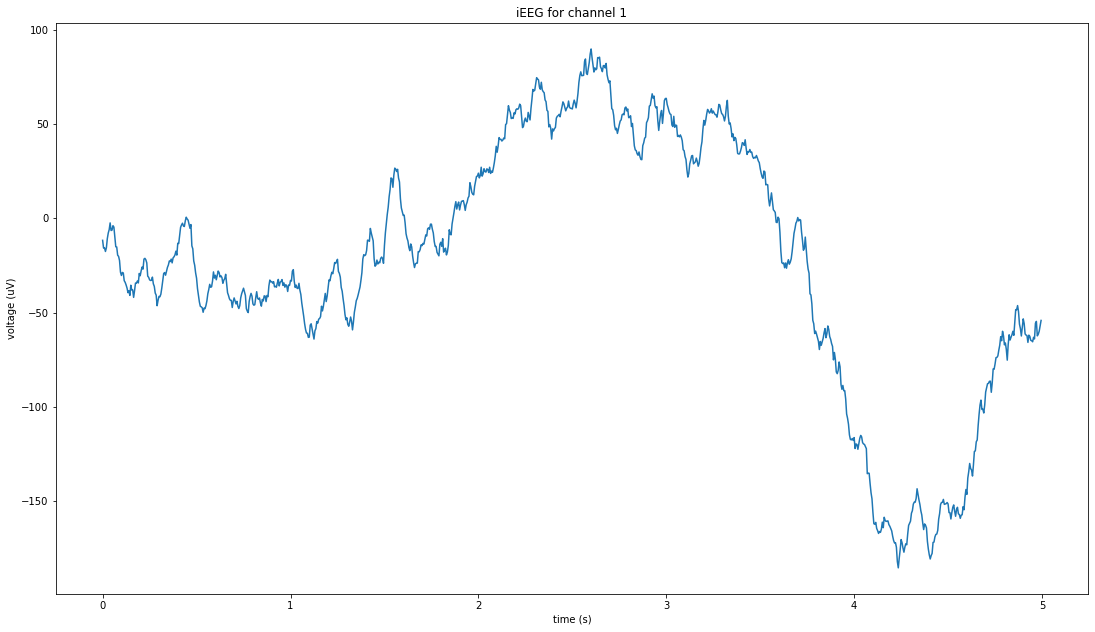

In [281]:
ieeg = nwbfile.acquisition["ecephys.ieeg"]
data = ieeg.data[:datapoints, channel]
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(time, data)
ax.set_xlabel("time (s)")
ax.set_ylabel("voltage (uV)")
ax.set_title(f"iEEG for channel {channel + 1}")
plt.show()

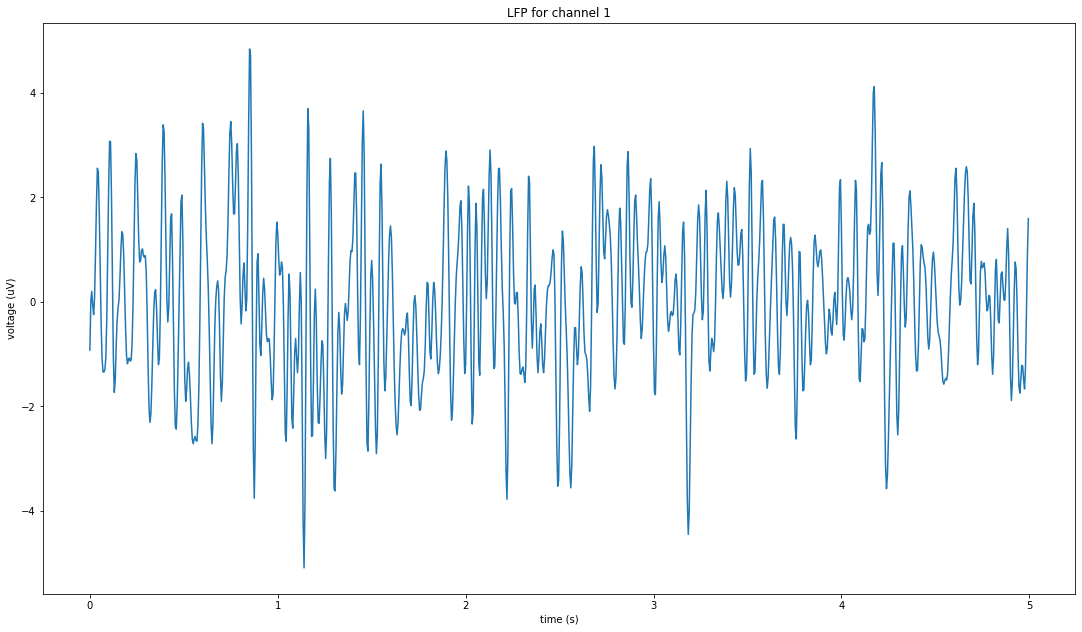

In [282]:
lfp = nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ecephys.lfp"]
data = lfp.data[:datapoints, channel]
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(time, data)
ax.set_xlabel("time (s)")
ax.set_ylabel("voltage (uV)")
ax.set_title(f"LFP for channel {channel + 1}")
plt.show()

In [25]:
units = nwbfile.units
units

units pynwb.misc.Units at 0x140656412998576
Fields:
  colnames: ['offset' 'spike_times' 'obs_intervals' 'electrodes' 'electrode_group'
 'waveform_mean' 'waveform_sd']
  columns: (
    offset <class 'hdmf.common.table.VectorData'>,
    spike_times_index <class 'hdmf.common.table.VectorIndex'>,
    spike_times <class 'hdmf.common.table.VectorData'>,
    obs_intervals_index <class 'hdmf.common.table.VectorIndex'>,
    obs_intervals <class 'hdmf.common.table.VectorData'>,
    electrodes_index <class 'hdmf.common.table.VectorIndex'>,
    electrodes <class 'hdmf.common.table.DynamicTableRegion'>,
    electrode_group <class 'hdmf.common.table.VectorData'>,
    waveform_mean <class 'hdmf.common.table.VectorData'>,
    waveform_sd <class 'hdmf.common.table.VectorData'>
  )
  description: Autogenerated by NWBFile
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  waveform_rate: 32000.0
  waveform_unit: volts

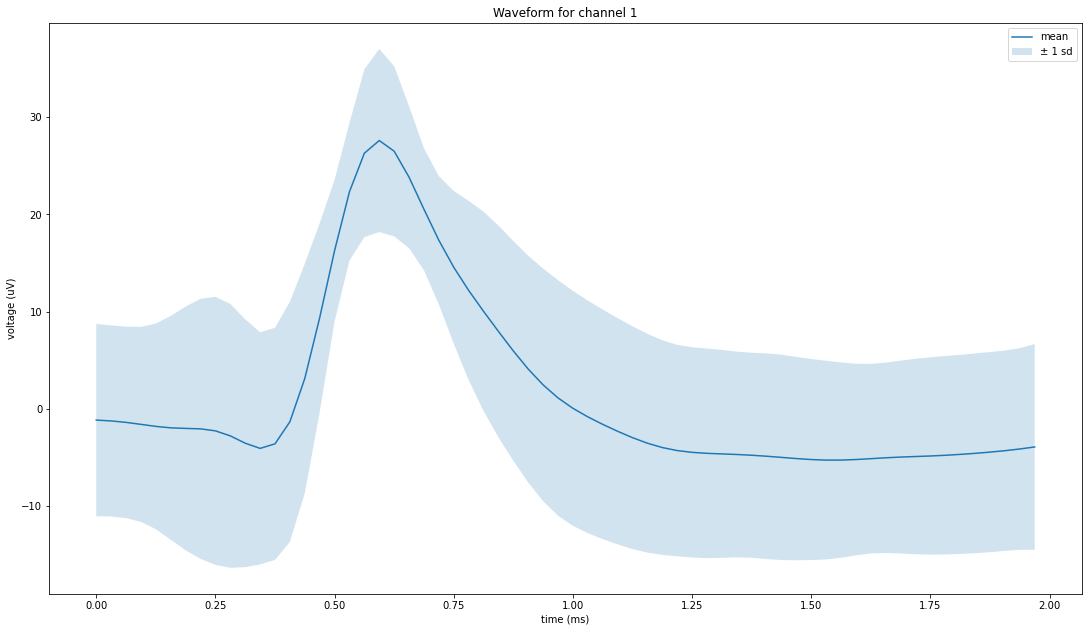

In [283]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
mean = units["waveform_mean"][channel, :] * 1e6
sd = units["waveform_sd"][channel, :] * 2e6
time = np.arange(len(mean)) / units.waveform_rate * 1000
# plot with sd as a shaded region
ax.plot(time, mean, label="mean")
ax.fill_between(time, mean - sd, mean + sd, alpha=0.2, label="± 1 sd")
ax.set_xlabel("time (ms)")
ax.set_ylabel("voltage (uV)")
ax.set_title(f"Waveform for channel {channel + 1}")
ax.legend()
plt.show()



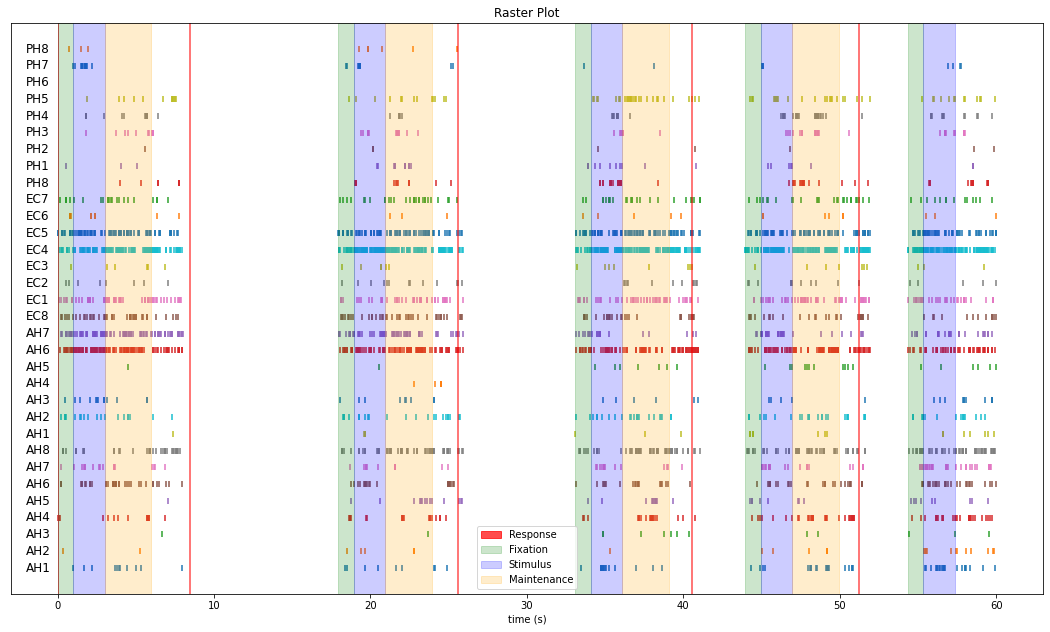

In [275]:
# Raster plot
spike_times = units["spike_times"]
units_in_raster = 32
max_time = 60
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
labels = [f"{df.label.values[0][:-2]}{i%8 + 1}" for i, df in enumerate(units["electrodes"][:])]
for i in range(units_in_raster):
    label = labels[i]
    times = [time for time in spike_times[i] if time < max_time]
    ax.scatter(times, np.ones_like(times) * i, marker="|")
    # add label
    ax.text(-2, i, label, fontsize=12, verticalalignment="center")
ax.set_xlabel("time (s)")
ax.set_yticks([])
ax.set_title(f"Raster Plot")
# add answer vertical lines
answers = nwbfile.processing["behavior"].data_interfaces["BehavioralEvents.response"].time_series["response"].timestamps
answers = [answer for answer in answers if answer < max_time]
for answer in answers:
    ax.axvline(answer, color="red", alpha=0.7)
    
# color background according to epoch
epochs = nwbfile.epochs.to_dataframe()
epochs = epochs[epochs["stop_time"] < max_time]
fixations = epochs[epochs["tags"] == "Fixation"]
for i, row in fixations.iterrows():
    ax.axvspan(row["start_time"], row["stop_time"], alpha=0.2, color="green")
stimuli = epochs[epochs["tags"] == "Stimulus"]
for i, row in stimuli.iterrows():
    ax.axvspan(row["start_time"], row["stop_time"], alpha=0.2, color="blue")
maintenances = epochs[epochs["tags"] == "Maintenance"]
for i, row in maintenances.iterrows():
    ax.axvspan(row["start_time"], row["stop_time"], alpha=0.2, color="orange")

ax.axvspan(0, 0, alpha=0.7, color="red", label="Response")
ax.axvspan(0, 0, alpha=0.2, color="green", label="Fixation")
ax.axvspan(0, 0, alpha=0.2, color="blue", label="Stimulus")
ax.axvspan(0, 0, alpha=0.2, color="orange", label="Maintenance")
ax.legend()

plt.show()